In [68]:
import pandas as pd
import seaborn as sns

In [2]:
df1 = pd.DataFrame({
    "sequence": ["ABCD", "EFGH", "IJKL"],
    "name": ["seq1", "seq2", "seq3"],
    "length": [4, 4, 4]
})

df2 = pd.DataFrame({
    "sequence": ["ABCD", "EFGH", "MNOP"],
    "name": ["seq1", "seq2", "seq4"],
    "length": [4, 4, 4]
})

In [3]:
df1

,sequence,name,length
0,ABCD,seq1,4
1,EFGH,seq2,4
2,IJKL,seq3,4


In [4]:
df2

,sequence,name,length
0,ABCD,seq1,4
1,EFGH,seq2,4
2,MNOP,seq4,4


In [11]:
new_df = pd.concat([df1, df2], ignore_index=True).drop_duplicates(subset=["sequence"]).reset_index(drop=True)
new_df

,sequence,name,length
0,ABCD,seq1,4
1,EFGH,seq2,4
2,IJKL,seq3,4
3,MNOP,seq4,4


In [13]:
df1_only = df1[~df1["sequence"].isin(df2["sequence"])]
df1_only

,sequence,name,length
2,IJKL,seq3,4


In [14]:
df2_only = df2[~df2["sequence"].isin(df1["sequence"])]
df2_only

,sequence,name,length
2,MNOP,seq4,4


# 1. Exploracion dataset

In [ ]:
df = pd.read_csv("../2108-examples/uniprot_sample.csv")
df.head()

,accession,protein_name,ec_numbers,organism_name,taxon_id,sequence,length,go_terms,pfam_ids,alphafold_ids,pdb_ids,activity
0,P0DKZ8,Bradykinin-potentiating peptide 7c,NaN,Bothrops fonsecai,157549,QRWPSPK,7,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor
1,P0C7S7,Bradykinin-potentiating peptide TmF,NaN,Protobothrops mucrosquamatus,103944,QGRPLGPPIPP,11,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor
2,P09470,Angiotensin-converting enzyme,['3.4.15.1'],Mus musculus,10090,MGAASGQRGRWPLSPPLLMLSLLVLLLQPSPAPALDPGLQPGNFSP...,1312,"['GO:0009925', 'GO:0031526', 'GO:0005737', 'GO...",['PF01401'],['P09470'],[],ace-inhibitor
3,P0C7R8,Bradykinin-potentiating peptide 13a,NaN,Bothrops erythromelas,44710,QGGWPRPGPEIPP,13,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor
4,Q90Y12,Bradykinin potentiating and C-type natriuretic...,NaN,Crotalus durissus terrificus,8732,MFVSRLAASGLLLLALLAVSLDGKPLQQWSQRWPHLEIPPLVVQNW...,181,"['GO:0005576', 'GO:0005179', 'GO:0030414', 'GO...",['PF00212'],['Q90Y12'],[],ace-inhibitor


In [20]:
df.shape

(2748, 12)

In [19]:
df.isnull().sum().sort_values(ascending=False)

ec_numbers       1858
alphafold_ids       3
pdb_ids             3
go_terms            3
pfam_ids            3
organism_name       0
accession           0
protein_name        0
length              0
sequence            0
taxon_id            0
activity            0
dtype: int64

In [21]:
df.dtypes

accession        object
protein_name     object
ec_numbers       object
organism_name    object
taxon_id          int64
sequence         object
length            int64
go_terms         object
pfam_ids         object
alphafold_ids    object
pdb_ids          object
activity         object
dtype: object

# 2. Estadisticos Basicos

In [22]:
df.describe()

,taxon_id,length
count,2.748000e+03,2748.000000
mean,1.548845e+05,501.478530
std,3.976214e+05,679.097881
min,3.220000e+02,4.000000
25%,9.606000e+03,139.000000
50%,1.009000e+04,345.000000
75%,9.437775e+04,559.000000
max,3.148341e+06,11872.000000


In [23]:
df["length"].max()

np.int64(11872)

In [24]:
df["length"].min()

np.int64(4)

In [25]:
df["length"].mean()

np.float64(501.47852983988355)

# Conteos

In [28]:
df.shape[0]

2748

In [29]:
df["sequence"].nunique()

2545

In [30]:
df["sequence"].duplicated().sum()

np.int64(203)

In [31]:
df[df["sequence"].duplicated(keep=False)].sort_values("sequence")

,accession,protein_name,ec_numbers,organism_name,taxon_id,sequence,length,go_terms,pfam_ids,alphafold_ids,pdb_ids,activity
2585,P59084,DeltaKappa-actitoxin-Avd4b,NaN,Anemonia sulcata,6108,AAPCFCPGKPDRGDLWILRGTCPGGYGYTSNCYKWPNICCYPH,43,"['GO:0005576', 'GO:0042151', 'GO:0008200', 'GO...",['PF07936'],['P59084'],[],hypotensive
1454,P59084,DeltaKappa-actitoxin-Avd4b,NaN,Anemonia sulcata,6108,AAPCFCPGKPDRGDLWILRGTCPGGYGYTSNCYKWPNICCYPH,43,"['GO:0005576', 'GO:0042151', 'GO:0008200', 'GO...",['PF07936'],['P59084'],[],antihypertensive
784,P0DM12,Mu-theraphotoxin-Pn3a,NaN,Pamphobeteus nigricolor,2083160,DCRYMFGDCEKDEDCCKHLGCKRKMKYCAWDFTFT,35,"['GO:0005576', 'GO:0008200', 'GO:0017080', 'GO...",['PF07740'],['P0DM12'],['5T4R'],opioid-agonist
1122,P0DM12,Mu-theraphotoxin-Pn3a,NaN,Pamphobeteus nigricolor,2083160,DCRYMFGDCEKDEDCCKHLGCKRKMKYCAWDFTFT,35,"['GO:0005576', 'GO:0008200', 'GO:0017080', 'GO...",['PF07740'],['P0DM12'],['5T4R'],opioid
1903,P01016,Angiotensinogen,NaN,Equus caballus,9796,DRVYIHPFHLLVYS,14,"['GO:0005576', 'GO:0010718', 'GO:0042310']",[],[],['1ER8'],antithrombotic
...,...,...,...,...,...,...,...,...,...,...,...,...
781,P05128,Protein kinase C gamma type,['2.7.11.13'],Bos taurus,9913,RPLFCRKGALRQKVVHEVKSHKFTARFFKQPTFCSHCTDFIWGIGK...,682,"['GO:0005829', 'GO:0030425', 'GO:0048471', 'GO...","['PF00130', 'PF00168', 'PF00069', 'PF00433']",['P05128'],[],opioid-agonist
2116,Q3SAE9,Natriuretic peptide TcNPa,NaN,Tropidechis carinatus,100989,SGSETAKIGDGCFGLPIDRIGSASGMGCGSVPKPTPGGS,39,"['GO:0005576', 'GO:0005179', 'GO:0090729', 'GO...",['PF00212'],['Q3SAE9'],[],natriuretic
2589,Q3SAE9,Natriuretic peptide TcNPa,NaN,Tropidechis carinatus,100989,SGSETAKIGDGCFGLPIDRIGSASGMGCGSVPKPTPGGS,39,"['GO:0005576', 'GO:0005179', 'GO:0090729', 'GO...",['PF00212'],['Q3SAE9'],[],hypotensive
1835,B3A0C4,Extended FMRFamide-5,NaN,Hemilobophasma montaguense,253130,TDRNFLRL,8,"['GO:0005576', 'GO:0007218']",[],[],[],neuropeptide


In [33]:
df.groupby("length").size()

length
4        1
5        1
7        5
8        7
9        5
        ..
7078     1
7079     1
7119     1
7182     1
11872    1
Length: 967, dtype: int64

In [36]:
# CUal es la distribucion de aminoacidos
all_aa = "".join(df["sequence"].dropna())
counts = {aa: all_aa.count(aa) for aa in set(all_aa)}
counts


{'F': 54650,
 'A': 101771,
 'V': 91639,
 'W': 20310,
 'C': 30564,
 'R': 71913,
 'I': 70948,
 'T': 81346,
 'S': 103254,
 'M': 31398,
 'U': 7,
 'X': 43,
 'N': 57359,
 'L': 133823,
 'K': 72636,
 'G': 94871,
 'D': 71039,
 'P': 74042,
 'Y': 42439,
 'B': 1,
 'E': 84335,
 'H': 32777,
 'Q': 56898}

In [37]:
# Secuencias canonicas
def is_canon(seq):
    aa_symbols = set("ACDEFGHIKLMNPQRSTVWY")
    return all(aa in aa_symbols for aa in seq)

df["is_canon"] = df["sequence"].apply(is_canon)
df.head()

,accession,protein_name,ec_numbers,organism_name,taxon_id,sequence,length,go_terms,pfam_ids,alphafold_ids,pdb_ids,activity,is_canon
0,P0DKZ8,Bradykinin-potentiating peptide 7c,NaN,Bothrops fonsecai,157549,QRWPSPK,7,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,True
1,P0C7S7,Bradykinin-potentiating peptide TmF,NaN,Protobothrops mucrosquamatus,103944,QGRPLGPPIPP,11,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,True
2,P09470,Angiotensin-converting enzyme,['3.4.15.1'],Mus musculus,10090,MGAASGQRGRWPLSPPLLMLSLLVLLLQPSPAPALDPGLQPGNFSP...,1312,"['GO:0009925', 'GO:0031526', 'GO:0005737', 'GO...",['PF01401'],['P09470'],[],ace-inhibitor,True
3,P0C7R8,Bradykinin-potentiating peptide 13a,NaN,Bothrops erythromelas,44710,QGGWPRPGPEIPP,13,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,True
4,Q90Y12,Bradykinin potentiating and C-type natriuretic...,NaN,Crotalus durissus terrificus,8732,MFVSRLAASGLLLLALLAVSLDGKPLQQWSQRWPHLEIPPLVVQNW...,181,"['GO:0005576', 'GO:0005179', 'GO:0030414', 'GO...",['PF00212'],['Q90Y12'],[],ace-inhibitor,True


# Visualizaciones

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

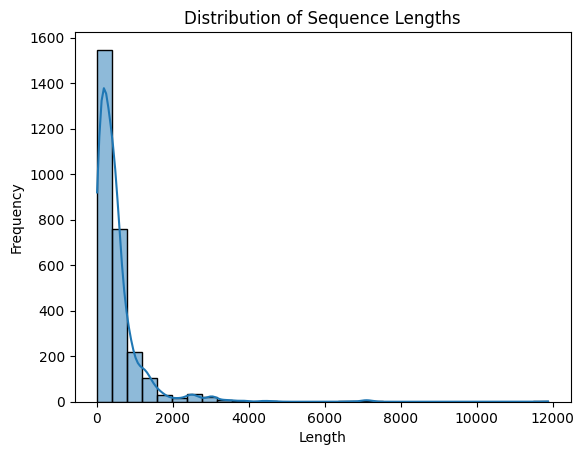

In [39]:
sns.histplot(df["length"], bins=30, kde=True)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_71026/331420812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


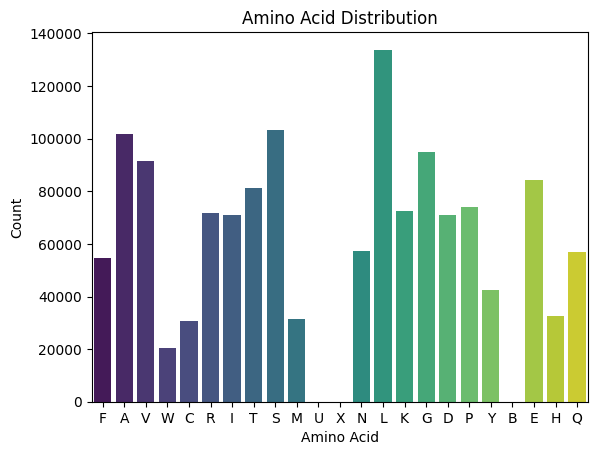

In [42]:
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
plt.title("Amino Acid Distribution")
plt.xlabel("Amino Acid")
plt.ylabel("Count")
plt.show()

# Manejo de numpy

In [46]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [45]:
df = pd.DataFrame({
    "sequence": ["ABCD", "EFGH", "IJKL"]
})
df


,sequence
0,ABCD
1,EFGH
2,IJKL


In [47]:
encoder = OneHotEncoder()

In [48]:
flat_chars = np.array([list(seq) for seq in df["sequence"]]).flatten().reshape(-1, 1)
flat_chars

array([['A'],
       ['B'],
       ['C'],
       ['D'],
       ['E'],
       ['F'],
       ['G'],
       ['H'],
       ['I'],
       ['J'],
       ['K'],
       ['L']], dtype='<U1')

In [ ]:
encoder.fit(flat_chars)

encoded_sequences = [encoder.transform(np.array(list(seq)).reshape(-1, 1)) for seq in df["sequence"]]
encoded_sequences = [enc.toarray() for enc in encoded_sequences]
encoded_sequences

# A, B, C, D, E, F, G, H, I, J, K, L
# 1, 0, 0, 0, 0, 0, 0, 0, 0, 0
# 0, 1, 0, 0, 0, 0, 0, 0, 0, 0
# 0, 0, 1, 0, 0, 0, 0, 0, 0, 0


[array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])]

In [52]:
np.save("encoded_sequences.npy", encoded_sequences)

In [53]:
loaded_sequences = np.load("encoded_sequences.npy")
loaded_sequences

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]])

# Ejercicios

1. Crear una nueva columna `is_peptide` que sea `True` si la secuencia tiene menos de 50 aa.  
2. Contar cuántas secuencias cumplen esa condición
- 2.1. Crear una nueva columna type que transforme True/False en etiquetas legibles: "peptide" y "protein".
- 2.2. Realizar un boxplot de la longitud de las secuencias, usando la columna type para diferenciar péptidos y proteínas.
3. Ordenar el DataFrame por longitud de la secuencia y mostrar las 3 más largas.  
5. Analizar cuántas secuencias corresponden a cada tipo de actividad (por ejemplo ace-inhibitor) y mostrarlo en un gráfico de barras.
4. Exportar a CSV las secuencias únicas (`sequence`, `length`).  

In [ ]:
df = pd.read_csv("../2108-examples/uniprot_sample.csv")
df

,accession,protein_name,ec_numbers,organism_name,taxon_id,sequence,length,go_terms,pfam_ids,alphafold_ids,pdb_ids,activity
0,P0DKZ8,Bradykinin-potentiating peptide 7c,NaN,Bothrops fonsecai,157549,QRWPSPK,7,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor
1,P0C7S7,Bradykinin-potentiating peptide TmF,NaN,Protobothrops mucrosquamatus,103944,QGRPLGPPIPP,11,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor
2,P09470,Angiotensin-converting enzyme,['3.4.15.1'],Mus musculus,10090,MGAASGQRGRWPLSPPLLMLSLLVLLLQPSPAPALDPGLQPGNFSP...,1312,"['GO:0009925', 'GO:0031526', 'GO:0005737', 'GO...",['PF01401'],['P09470'],[],ace-inhibitor
3,P0C7R8,Bradykinin-potentiating peptide 13a,NaN,Bothrops erythromelas,44710,QGGWPRPGPEIPP,13,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor
4,Q90Y12,Bradykinin potentiating and C-type natriuretic...,NaN,Crotalus durissus terrificus,8732,MFVSRLAASGLLLLALLAVSLDGKPLQQWSQRWPHLEIPPLVVQNW...,181,"['GO:0005576', 'GO:0005179', 'GO:0030414', 'GO...",['PF00212'],['Q90Y12'],[],ace-inhibitor
...,...,...,...,...,...,...,...,...,...,...,...,...
2743,P16310,Growth hormone receptor,NaN,Rattus norvegicus,10116,MDLWRVFLTLALAVSSDMFPGSGATPATLGKASPVLQRINPSLRES...,638,"['GO:0009986', 'GO:0036464', 'GO:0005829', 'GO...","['PF09067', 'PF12772']",['P16310'],[],cytokine-growth-factor
2744,Q8N6P7,Interleukin-22 receptor subunit alpha-1,NaN,Homo sapiens,9606,MRTLLTILTVGSLAAHAPEDPSDLLQHVKFQSSNFENILTWDSGPE...,574,"['GO:0005886', 'GO:0004896', 'GO:0004904', 'GO...",['PF01108'],['Q8N6P7'],"['3DGC', '3DLQ', '6DF3']",cytokine-growth-factor
2745,Q49M28,Neurotrophic factor BDNF precursor form,NaN,Lipotes vexillifer,118797,MTILFLTMVISYFSCMKAAPMKEANVRGQGSLAYPGMRTHGTLESV...,248,"['GO:0030424', 'GO:0030425', 'GO:0005615', 'GO...",['PF00243'],['Q49M28'],[],cytokine-growth-factor
2746,P21583,Kit ligand,NaN,Homo sapiens,9606,MKKTQTWILTCIYLQLLLFNPLVKTEGICRNRVTNNVKDVTKLVAN...,273,"['GO:0005737', 'GO:0005856', 'GO:0005576', 'GO...",['PF02404'],['P21583'],"['1EXZ', '1SCF', '2E9W', '8DFM', '8DFP', '8DFQ']",cytokine-growth-factor


In [61]:
df["is_peptide"] = df.apply(lambda row: len(row["sequence"]) < 50, axis=1)
df

,accession,protein_name,ec_numbers,organism_name,taxon_id,sequence,length,go_terms,pfam_ids,alphafold_ids,pdb_ids,activity,is_peptide
0,P0DKZ8,Bradykinin-potentiating peptide 7c,NaN,Bothrops fonsecai,157549,QRWPSPK,7,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,True
1,P0C7S7,Bradykinin-potentiating peptide TmF,NaN,Protobothrops mucrosquamatus,103944,QGRPLGPPIPP,11,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,True
2,P09470,Angiotensin-converting enzyme,['3.4.15.1'],Mus musculus,10090,MGAASGQRGRWPLSPPLLMLSLLVLLLQPSPAPALDPGLQPGNFSP...,1312,"['GO:0009925', 'GO:0031526', 'GO:0005737', 'GO...",['PF01401'],['P09470'],[],ace-inhibitor,False
3,P0C7R8,Bradykinin-potentiating peptide 13a,NaN,Bothrops erythromelas,44710,QGGWPRPGPEIPP,13,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,True
4,Q90Y12,Bradykinin potentiating and C-type natriuretic...,NaN,Crotalus durissus terrificus,8732,MFVSRLAASGLLLLALLAVSLDGKPLQQWSQRWPHLEIPPLVVQNW...,181,"['GO:0005576', 'GO:0005179', 'GO:0030414', 'GO...",['PF00212'],['Q90Y12'],[],ace-inhibitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,P16310,Growth hormone receptor,NaN,Rattus norvegicus,10116,MDLWRVFLTLALAVSSDMFPGSGATPATLGKASPVLQRINPSLRES...,638,"['GO:0009986', 'GO:0036464', 'GO:0005829', 'GO...","['PF09067', 'PF12772']",['P16310'],[],cytokine-growth-factor,False
2744,Q8N6P7,Interleukin-22 receptor subunit alpha-1,NaN,Homo sapiens,9606,MRTLLTILTVGSLAAHAPEDPSDLLQHVKFQSSNFENILTWDSGPE...,574,"['GO:0005886', 'GO:0004896', 'GO:0004904', 'GO...",['PF01108'],['Q8N6P7'],"['3DGC', '3DLQ', '6DF3']",cytokine-growth-factor,False
2745,Q49M28,Neurotrophic factor BDNF precursor form,NaN,Lipotes vexillifer,118797,MTILFLTMVISYFSCMKAAPMKEANVRGQGSLAYPGMRTHGTLESV...,248,"['GO:0030424', 'GO:0030425', 'GO:0005615', 'GO...",['PF00243'],['Q49M28'],[],cytokine-growth-factor,False
2746,P21583,Kit ligand,NaN,Homo sapiens,9606,MKKTQTWILTCIYLQLLLFNPLVKTEGICRNRVTNNVKDVTKLVAN...,273,"['GO:0005737', 'GO:0005856', 'GO:0005576', 'GO...",['PF02404'],['P21583'],"['1EXZ', '1SCF', '2E9W', '8DFM', '8DFP', '8DFQ']",cytokine-growth-factor,False


In [65]:
def is_peptide(seq):
    return len(seq) < 50

df["is_peptide"] = df["sequence"].apply(is_peptide)
df

,accession,protein_name,ec_numbers,organism_name,taxon_id,sequence,length,go_terms,pfam_ids,alphafold_ids,pdb_ids,activity,is_peptide
0,P0DKZ8,Bradykinin-potentiating peptide 7c,NaN,Bothrops fonsecai,157549,QRWPSPK,7,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,True
1,P0C7S7,Bradykinin-potentiating peptide TmF,NaN,Protobothrops mucrosquamatus,103944,QGRPLGPPIPP,11,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,True
2,P09470,Angiotensin-converting enzyme,['3.4.15.1'],Mus musculus,10090,MGAASGQRGRWPLSPPLLMLSLLVLLLQPSPAPALDPGLQPGNFSP...,1312,"['GO:0009925', 'GO:0031526', 'GO:0005737', 'GO...",['PF01401'],['P09470'],[],ace-inhibitor,False
3,P0C7R8,Bradykinin-potentiating peptide 13a,NaN,Bothrops erythromelas,44710,QGGWPRPGPEIPP,13,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,True
4,Q90Y12,Bradykinin potentiating and C-type natriuretic...,NaN,Crotalus durissus terrificus,8732,MFVSRLAASGLLLLALLAVSLDGKPLQQWSQRWPHLEIPPLVVQNW...,181,"['GO:0005576', 'GO:0005179', 'GO:0030414', 'GO...",['PF00212'],['Q90Y12'],[],ace-inhibitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,P16310,Growth hormone receptor,NaN,Rattus norvegicus,10116,MDLWRVFLTLALAVSSDMFPGSGATPATLGKASPVLQRINPSLRES...,638,"['GO:0009986', 'GO:0036464', 'GO:0005829', 'GO...","['PF09067', 'PF12772']",['P16310'],[],cytokine-growth-factor,False
2744,Q8N6P7,Interleukin-22 receptor subunit alpha-1,NaN,Homo sapiens,9606,MRTLLTILTVGSLAAHAPEDPSDLLQHVKFQSSNFENILTWDSGPE...,574,"['GO:0005886', 'GO:0004896', 'GO:0004904', 'GO...",['PF01108'],['Q8N6P7'],"['3DGC', '3DLQ', '6DF3']",cytokine-growth-factor,False
2745,Q49M28,Neurotrophic factor BDNF precursor form,NaN,Lipotes vexillifer,118797,MTILFLTMVISYFSCMKAAPMKEANVRGQGSLAYPGMRTHGTLESV...,248,"['GO:0030424', 'GO:0030425', 'GO:0005615', 'GO...",['PF00243'],['Q49M28'],[],cytokine-growth-factor,False
2746,P21583,Kit ligand,NaN,Homo sapiens,9606,MKKTQTWILTCIYLQLLLFNPLVKTEGICRNRVTNNVKDVTKLVAN...,273,"['GO:0005737', 'GO:0005856', 'GO:0005576', 'GO...",['PF02404'],['P21583'],"['1EXZ', '1SCF', '2E9W', '8DFM', '8DFP', '8DFQ']",cytokine-growth-factor,False


In [66]:
df["is_peptide"].value_counts()

is_peptide
False    2514
True      234
Name: count, dtype: int64

In [67]:
df["is_peptide"] = df["is_peptide"].map({True: "peptide", False: "protein"})
df

,accession,protein_name,ec_numbers,organism_name,taxon_id,sequence,length,go_terms,pfam_ids,alphafold_ids,pdb_ids,activity,is_peptide
0,P0DKZ8,Bradykinin-potentiating peptide 7c,NaN,Bothrops fonsecai,157549,QRWPSPK,7,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,peptide
1,P0C7S7,Bradykinin-potentiating peptide TmF,NaN,Protobothrops mucrosquamatus,103944,QGRPLGPPIPP,11,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,peptide
2,P09470,Angiotensin-converting enzyme,['3.4.15.1'],Mus musculus,10090,MGAASGQRGRWPLSPPLLMLSLLVLLLQPSPAPALDPGLQPGNFSP...,1312,"['GO:0009925', 'GO:0031526', 'GO:0005737', 'GO...",['PF01401'],['P09470'],[],ace-inhibitor,protein
3,P0C7R8,Bradykinin-potentiating peptide 13a,NaN,Bothrops erythromelas,44710,QGGWPRPGPEIPP,13,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,peptide
4,Q90Y12,Bradykinin potentiating and C-type natriuretic...,NaN,Crotalus durissus terrificus,8732,MFVSRLAASGLLLLALLAVSLDGKPLQQWSQRWPHLEIPPLVVQNW...,181,"['GO:0005576', 'GO:0005179', 'GO:0030414', 'GO...",['PF00212'],['Q90Y12'],[],ace-inhibitor,protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,P16310,Growth hormone receptor,NaN,Rattus norvegicus,10116,MDLWRVFLTLALAVSSDMFPGSGATPATLGKASPVLQRINPSLRES...,638,"['GO:0009986', 'GO:0036464', 'GO:0005829', 'GO...","['PF09067', 'PF12772']",['P16310'],[],cytokine-growth-factor,protein
2744,Q8N6P7,Interleukin-22 receptor subunit alpha-1,NaN,Homo sapiens,9606,MRTLLTILTVGSLAAHAPEDPSDLLQHVKFQSSNFENILTWDSGPE...,574,"['GO:0005886', 'GO:0004896', 'GO:0004904', 'GO...",['PF01108'],['Q8N6P7'],"['3DGC', '3DLQ', '6DF3']",cytokine-growth-factor,protein
2745,Q49M28,Neurotrophic factor BDNF precursor form,NaN,Lipotes vexillifer,118797,MTILFLTMVISYFSCMKAAPMKEANVRGQGSLAYPGMRTHGTLESV...,248,"['GO:0030424', 'GO:0030425', 'GO:0005615', 'GO...",['PF00243'],['Q49M28'],[],cytokine-growth-factor,protein
2746,P21583,Kit ligand,NaN,Homo sapiens,9606,MKKTQTWILTCIYLQLLLFNPLVKTEGICRNRVTNNVKDVTKLVAN...,273,"['GO:0005737', 'GO:0005856', 'GO:0005576', 'GO...",['PF02404'],['P21583'],"['1EXZ', '1SCF', '2E9W', '8DFM', '8DFP', '8DFQ']",cytokine-growth-factor,protein


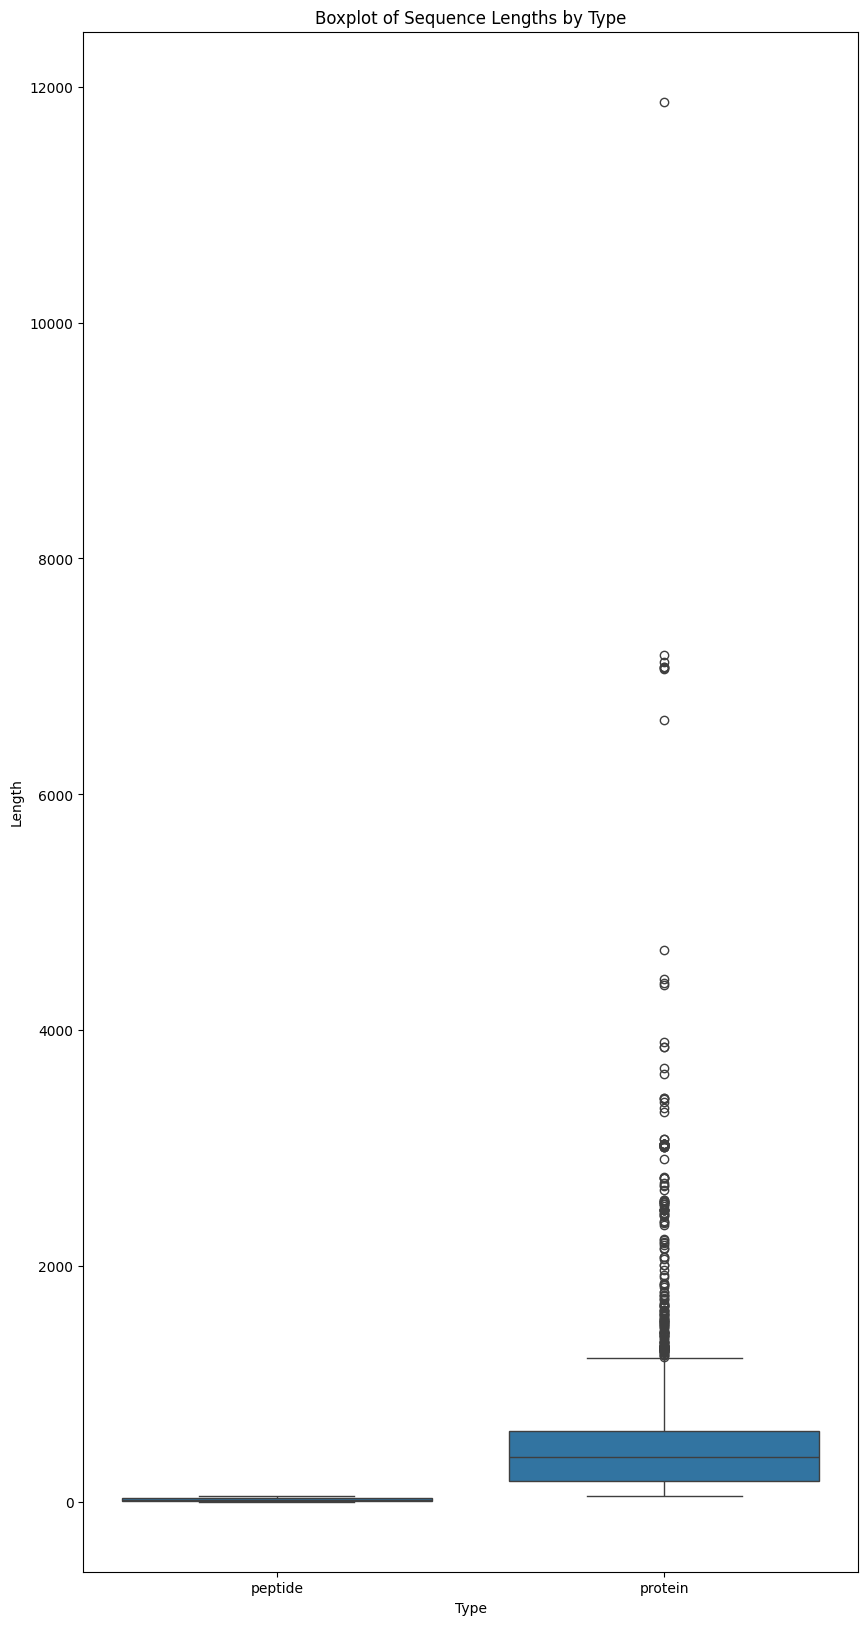

In [72]:
plt.figure(figsize=(10, 20))
sns.boxplot(x="is_peptide", y="length", data=df)
plt.ylabel("Length")
plt.xlabel("Type")
plt.title("Boxplot of Sequence Lengths by Type")
plt.show()

In [75]:
df.sort_values("length", ascending=False).head(3)

,accession,protein_name,ec_numbers,organism_name,taxon_id,sequence,length,go_terms,pfam_ids,alphafold_ids,pdb_ids,activity,is_peptide
258,A0A179H164,Nonribosomal peptide synthetase lcsA,['6.3.2.-'],Purpureocillium lilacinum,33203,MESTNNWATQAESHLLLDQAVAQAKVLNITKPNEQEGEAPWAIVIS...,11872,"['GO:0005737', 'GO:0016874', 'GO:0031177', 'GO...","['PF00501', 'PF00668', 'PF07993', 'PF00550']",[],[],antitumor,protein
2282,P0C6W4,Replicase polyprotein 1ab,NaN,Bat coronavirus HKU5,694008,MSFVAGVAPQGARGKYRAELNTEKRTDHVSLKASLCDAGDLVLKIS...,7182,"['GO:0044172', 'GO:0033644', 'GO:0044220', 'GO...","['PF13087', 'PF13604', 'PF16251', 'PF11501', '...",[],[],regulating,protein
623,P0C6W3,Replicase polyprotein 1ab,NaN,Bat coronavirus HKU4,694007,MLSKASVTTQGARGKYRAELYNEKRSDHVACTVPLCDTDDMACKLT...,7119,"['GO:0044172', 'GO:0033644', 'GO:0044220', 'GO...","['PF13087', 'PF13604', 'PF16251', 'PF11501', '...",[],"['4YO9', '4YOG', '4YOI', '4YOJ', '6MEA', '6MEB...",antiviral,protein


In [78]:
activity_counts = df["activity"].value_counts()
activity_counts

activity
ace-inhibitor                    50
anticancer                       50
chemotactic                      50
antitumor                        50
Blood-Brain-Barrier              50
                                 ..
bacterial-permease-ligand         5
polystyrene-surface-binding       5
orphan-receptor-gpr14-agonist     2
antioncogenic                     2
uterotonic                        1
Name: count, Length: 73, dtype: int64

/tmp/ipykernel_71026/3522759315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")


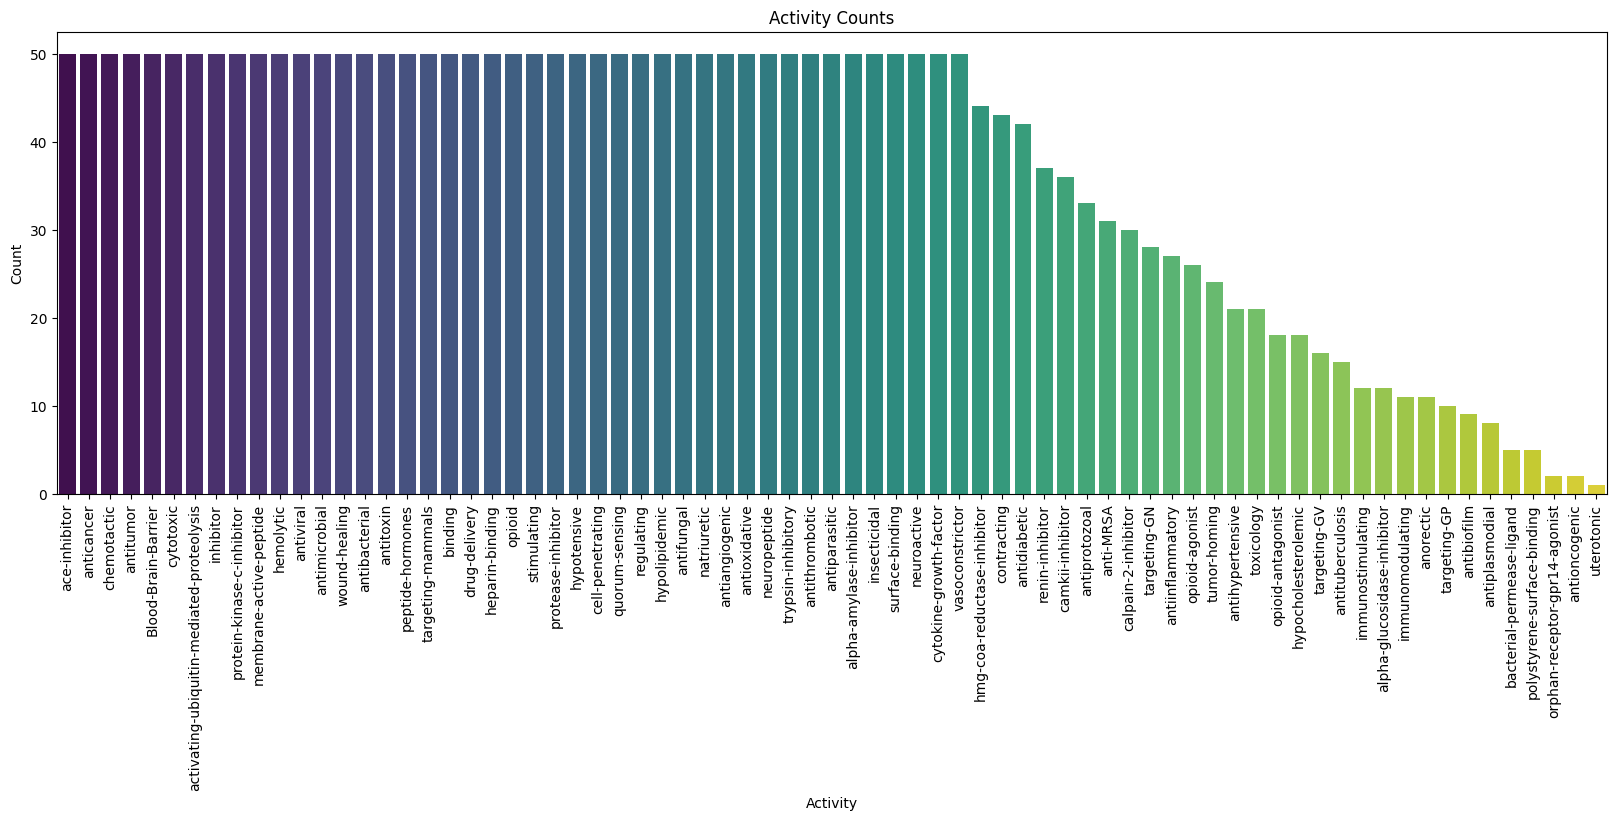

In [83]:
plt.figure(figsize=(20, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Counts")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df

,accession,protein_name,ec_numbers,organism_name,taxon_id,sequence,length,go_terms,pfam_ids,alphafold_ids,pdb_ids,activity,is_peptide
0,P0DKZ8,Bradykinin-potentiating peptide 7c,NaN,Bothrops fonsecai,157549,QRWPSPK,7,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,peptide
1,P0C7S7,Bradykinin-potentiating peptide TmF,NaN,Protobothrops mucrosquamatus,103944,QGRPLGPPIPP,11,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,peptide
2,P09470,Angiotensin-converting enzyme,['3.4.15.1'],Mus musculus,10090,MGAASGQRGRWPLSPPLLMLSLLVLLLQPSPAPALDPGLQPGNFSP...,1312,"['GO:0009925', 'GO:0031526', 'GO:0005737', 'GO...",['PF01401'],['P09470'],[],ace-inhibitor,protein
3,P0C7R8,Bradykinin-potentiating peptide 13a,NaN,Bothrops erythromelas,44710,QGGWPRPGPEIPP,13,"['GO:0005576', 'GO:0030414', 'GO:0090729', 'GO...",[],[],[],ace-inhibitor,peptide
4,Q90Y12,Bradykinin potentiating and C-type natriuretic...,NaN,Crotalus durissus terrificus,8732,MFVSRLAASGLLLLALLAVSLDGKPLQQWSQRWPHLEIPPLVVQNW...,181,"['GO:0005576', 'GO:0005179', 'GO:0030414', 'GO...",['PF00212'],['Q90Y12'],[],ace-inhibitor,protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,P16310,Growth hormone receptor,NaN,Rattus norvegicus,10116,MDLWRVFLTLALAVSSDMFPGSGATPATLGKASPVLQRINPSLRES...,638,"['GO:0009986', 'GO:0036464', 'GO:0005829', 'GO...","['PF09067', 'PF12772']",['P16310'],[],cytokine-growth-factor,protein
2744,Q8N6P7,Interleukin-22 receptor subunit alpha-1,NaN,Homo sapiens,9606,MRTLLTILTVGSLAAHAPEDPSDLLQHVKFQSSNFENILTWDSGPE...,574,"['GO:0005886', 'GO:0004896', 'GO:0004904', 'GO...",['PF01108'],['Q8N6P7'],"['3DGC', '3DLQ', '6DF3']",cytokine-growth-factor,protein
2745,Q49M28,Neurotrophic factor BDNF precursor form,NaN,Lipotes vexillifer,118797,MTILFLTMVISYFSCMKAAPMKEANVRGQGSLAYPGMRTHGTLESV...,248,"['GO:0030424', 'GO:0030425', 'GO:0005615', 'GO...",['PF00243'],['Q49M28'],[],cytokine-growth-factor,protein
2746,P21583,Kit ligand,NaN,Homo sapiens,9606,MKKTQTWILTCIYLQLLLFNPLVKTEGICRNRVTNNVKDVTKLVAN...,273,"['GO:0005737', 'GO:0005856', 'GO:0005576', 'GO...",['PF02404'],['P21583'],"['1EXZ', '1SCF', '2E9W', '8DFM', '8DFP', '8DFQ']",cytokine-growth-factor,protein


In [ ]:
export_df = df[~df["sequence"].duplicated(keep=False)]

In [92]:
export_df[["sequence", "length"]].to_csv("exported_sequences.csv", index=False)